In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv( 'day.csv' )

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df.shape

(730, 16)

In [7]:
df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df['casual'] + df['registered'] == df['cnt']

0      True
1      True
2      True
3      True
4      True
       ... 
725    True
726    True
727    True
728    True
729    True
Length: 730, dtype: bool

In [9]:
df.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)

In [10]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [11]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
num = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [13]:
#output
#Display each category wise user count


In [14]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print("-" * 30)

season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
------------------------------
yr
0    365
1    365
Name: yr, dtype: int64
------------------------------
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
------------------------------
holiday
0    709
1     21
Name: holiday, dtype: int64
------------------------------
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
------------------------------
workingday
1    499
0    231
Name: workingday, dtype: int64
------------------------------
weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64
------------------------------


In [15]:
for i in cat:
    print(df.groupby(i)['cnt'].sum())
    print("-"*30)

season
1     469514
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64
------------------------------
yr
0    1243103
1    2047742
Name: cnt, dtype: int64
------------------------------
mnth
1     134933
2     149518
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64
------------------------------
holiday
0    3212410
1      78435
Name: cnt, dtype: int64
------------------------------
weekday
0    444027
1    455503
2    469109
3    471214
4    485395
5    487790
6    477807
Name: cnt, dtype: int64
------------------------------
workingday
0    1000269
1    2290576
Name: cnt, dtype: int64
------------------------------
weathersit
1    2257952
2     995024
3      37869
Name: cnt, dtype: int64
------------------------------


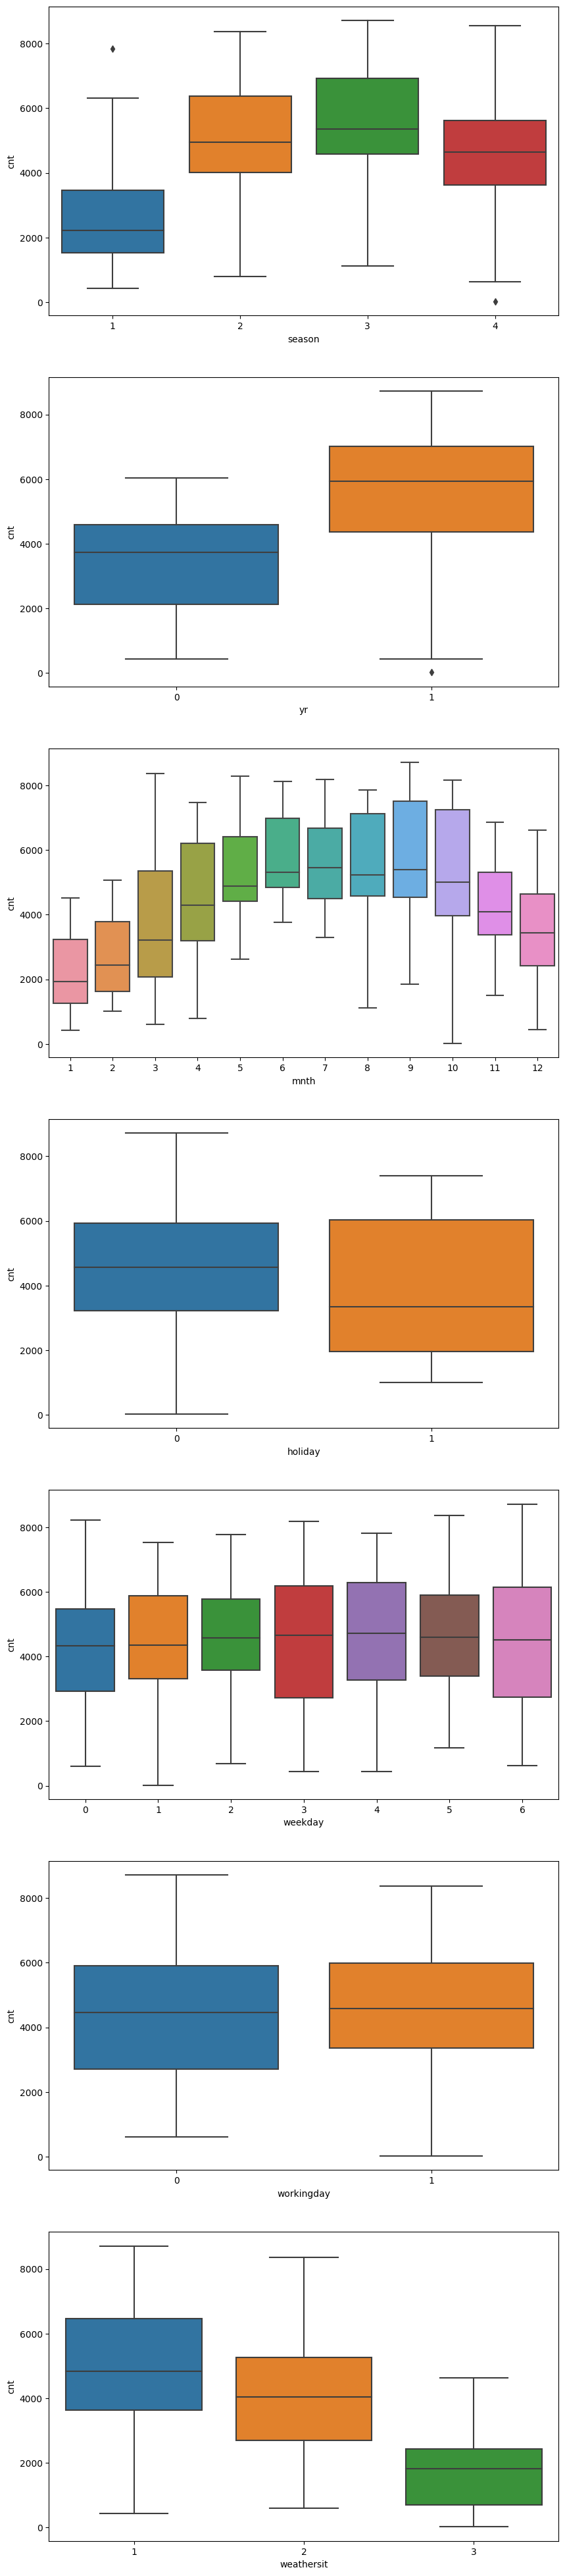

In [16]:
plt.figure(figsize = [10,50])
for i in range(len(cat)) :
    plt.subplot(7,1,i+1)
    sns.boxplot(data=df,x=cat[i],y = 'cnt',)
    plt.xlabel(cat[i])
    plt.ylabel('cnt')

In [17]:
df[num].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [18]:
#Data Preprocessing 

In [19]:
#categorical features
df_cat_dummies = pd.get_dummies(df[cat].astype('object'),dtype=np.int8)


In [20]:
#Numerical features : scaling
from sklearn.preprocessing import MinMaxScaler 

In [21]:
mn = MinMaxScaler ()
df[num]= mn.fit_transform(df[num])
df_num_mn = pd.DataFrame(mn.fit_transform(df[num]),index = df.index, columns=df[num].columns)

In [22]:
#df_num_mn.drop(['cnt','atemp'], axis = 1, inplace = True)


In [23]:
x = pd.concat([df_num_mn,df_cat_dummies],axis=1)
y = df['cnt']


In [24]:
x

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.243025,0.193709,0.671380,0.675656,0.240681,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
726,0.241986,0.230993,0.606684,0.274350,0.353543,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
727,0.241986,0.214393,0.774208,0.210260,0.151749,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
728,0.245101,0.200348,0.497001,0.676936,0.204096,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state=123)

In [27]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
model = LR.fit(x_train , y_train )

In [28]:

y_predict = LR.predict(x_test)

In [29]:
pd.DataFrame({'Actual' : y_test , 
             'Predicted' :  y_predict})

,Actual,Predicted
591,0.842729,0.842729
455,0.692476,0.692476
226,0.496549,0.496549
131,0.557064,0.557064
232,0.443051,0.443051
...,...,...
300,0.428555,0.428555
676,0.608951,0.608951
447,0.385412,0.385412
124,0.507478,0.507478


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [31]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R² Score: 1.00


In [32]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(584, 37) (146, 37)
(584,) (146,)


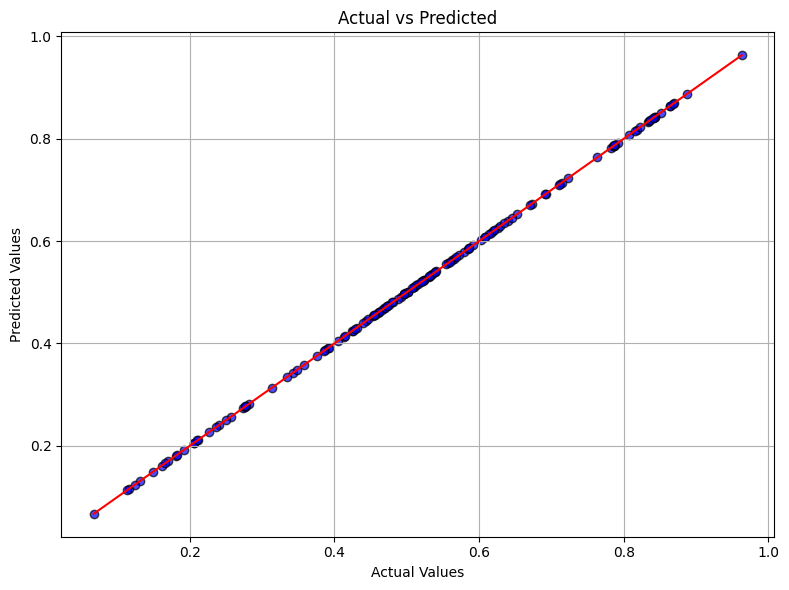

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import joblib as jb
jb.dump(model,"day_model.pkl")

['day_model.pkl']